In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("../data/meme/replies/meme_replies_total.csv")
df2 = pd.read_csv("../data/tweet/replies/tweet_replies.csv")

In [3]:
print(len(df1), len(df2))

4118 6725


In [4]:
# generate a new column for the year of the meme and tweet
df1['year'] = df1['date'].apply(lambda x: x.split('-')[0])
df2['year'] = df2['date'].apply(lambda x: x.split('-')[0])

In [5]:
df1_count = df1.groupby('year').count()
df2_count = df2.groupby('year').count()

In [6]:
# add a new column for the type of data
df1_count['type'] = 'meme'
df2_count['type'] = 'tweet'

# combine the two dataframes
df = pd.concat([df1_count, df2_count])

In [7]:
# add a new column for the total number of replies
df['total'] = df['id']
# reindex the dataframe
df = df.reset_index()
# drop the other columns that are not needed
df = df.drop(['id', 'conversation_id', 'date', 'body', 'text'], axis=1)

In [8]:
df

,year,type,total
0,2020,meme,1817
1,2021,meme,1818
2,2022,meme,483
3,2020,tweet,4139
4,2021,tweet,1963
5,2022,tweet,623


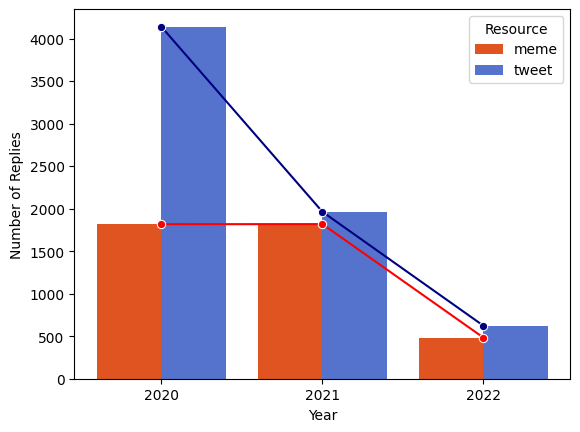

In [8]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
# barplot
ax1 = sns.barplot(x='year', y='total', hue='type', data=df, palette=["orangered","royalblue"])
# change the legend title
ax1.legend(title='Resource')
ax2 = sns.lineplot(x='year', y='total', hue='type', data=df, marker='o', legend=False, palette=["red","navy"])

ax1.set(xlabel='Year', ylabel='Number of Replies')


# save the figure
plt.savefig('../figures/comparison1.pdf', dpi=300, bbox_inches='tight')

plt.show()
